**FGV EPGE - Escola de Pós-graduação em Economia**
==
**Trabalho da Disciplina Deep Learning**
==

Professores: 


Monitora: 

Alunas: 

**Amazon Fine Food Reviews**

Analyze ~500,000 food reviews from Amazon.

## Based on **CRISP-DM**

The CRoss Industry Standard Process for Data Mining (CRISP-DM) is a process model that serves as the base for a data science process. It has six sequential phases:

- 1. Business understanding – What does the business need?
- 2. Data understanding – What data do we have / need? Is it clean?
- 3. Data preparation – How do we organize the data for modeling?
- 4. Modeling – What modeling techniques should we apply?
- 5. Evaluation – Which model best meets the business objectives?
- 6. Deployment – How do stakeholders access the results?

In [1]:
## libraries
import time
start_time = time.time()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from datetime import datetime
import os.path
import sys
import gc

import toolkit as tool



In [2]:
from time import gmtime, strftime
import requests as re
import re # for regex
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
#nltk.download('all')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score
import pickle
from transformers import BertTokenizer, BertForSequenceClassification
from nltk.tokenize import word_tokenize
import string
from collections import Counter
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import recall_score
import joblib

import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.preprocessing import sequence
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/andvsilva/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/andvsilva/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/andvsilva/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/home/andvsilva/repo/sentiment-analysis-deep-learning/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
PyTorch was not found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.
2026-01-27 19:24:45.419008: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2026-01-27 19:24:46.127631: I 

In [3]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.feature_extraction.text import CountVectorizer
from imblearn.over_sampling import SMOTE

In [4]:
now = datetime.now()
 
print("Run: date..............:", now)

Run: date..............: 2026-01-27 19:24:48.033140


### 1. Business understanding – What does the business need?

Compreender o contexto de negócios para a análise de sentimentos em avaliações de alimentos da Amazon é fundamental para identificar como essa análise pode ser aplicada de maneira relevante. Para a compreensão do negócio para a análise de sentimentos nessas avaliações:

1. **Descrição do problema**:
   A Amazon é uma das maiores varejistas online do mundo e possui uma vasta variedade de produtos disponíveis, incluindo alimentos. Os clientes têm a oportunidade de deixar avaliações e comentários sobre esses produtos, o que pode influenciar as decisões de compra de outros consumidores.

   A análise de sentimentos em avaliações de alimentos da Amazon visa extrair informações valiosas dessas avaliações, identificando a polaridade (positiva, negativa ou neutra) dos sentimentos expressos pelos clientes. Isso permite que a Amazon entenda melhor a satisfação do cliente em relação a um determinado produto e tome medidas adequadas para melhorar a experiência do cliente e a qualidade dos produtos oferecidos.

2. **Objetivos do negócio**:
   - Compreender a satisfação do cliente: A análise de sentimentos ajuda a determinar se os clientes estão satisfeitos ou insatisfeitos com os alimentos adquiridos na Amazon. Isso permite à empresa ter uma visão geral da percepção dos clientes em relação aos produtos oferecidos e identificar possíveis problemas ou áreas de melhoria.

   - Tomar decisões de negócios informadas: Ao analisar os sentimentos expressos nas avaliações, a Amazon pode identificar padrões e tendências que ajudam a tomar decisões informadas sobre quais produtos devem ser promovidos, quais necessitam de melhorias ou quais devem ser descontinuados.

   - Personalização da experiência do cliente: Com base na análise de sentimentos, a Amazon pode fornecer recomendações personalizadas aos clientes, levando em consideração suas preferências e opiniões expressas em avaliações anteriores. Isso melhora a experiência de compra do cliente e aumenta a fidelidade à marca.

3. **Fonte de dados**:
   A fonte de dados para a análise de sentimentos são as avaliações dos clientes sobre alimentos da Amazon. Esses dados podem incluir informações como texto da avaliação, classificação (por exemplo, de 1 a 5 estrelas), data da avaliação e informações do cliente (por exemplo, nome, localização, histórico de compras).

   Essas avaliações podem ser coletadas por meio da API pública da Amazon ou por meio de um conjunto de dados já disponível contendo avaliações históricas.

4. **Métricas de avaliação**:
   As métricas comuns para avaliar a eficácia da análise de sentimentos em avaliações de alimentos podem incluir:
   - Acurácia: percentual de avaliações classificadas corretamente em termos de sentimento (positivo, negativo ou neutro).
   - Precisão e revocação: medidas que indicam a proporção de avaliações positivas/negativas corretamente identificadas em relação ao total de avaliações positivas/negativas presentes nos dados.

   Outras métricas podem ser usadas, dependendo dos objetivos específicos do negócio.

In [5]:
## https://www.datascience-pm.com/crisp-dm-2/

#### https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews
df_reviews = pd.read_csv('../dataset/Reviews.csv') # full dataset

# reduce memory usage
df_reviews = tool.reduce_mem_usage(df_reviews)

# dataset size:
print(f'Numero de linhas: {df_reviews.shape[0]}, numero de colunas: {df_reviews.shape[1]}') 

Memory usage of dataframe is 43.37 MB
Memory usage after optimization is: 43.37 MB
Decreased by 0.0%
Numero de linhas: 568454, numero de colunas: 10


### 2. Data understanding – What data do we have / need? Is it clean?

- Explorar os dados:
  - Carregue o conjunto de dados em Python e examine sua estrutura e conteúdo.
  - Verifique as diferentes colunas presentes nos dados, como o texto do comentário, a classificação (positiva ou negativa) ou outras informações relevantes.

In [6]:
######## parte do dataset
df_reviews_copy = df_reviews.copy()
df_reviews_sample = df_reviews_copy.sample(15000) # FIXME remover no final

# release memory RAM - dataframe
tool.release_memory(df_reviews_copy)
tool.release_memory(df_reviews)
df_reviews = df_reviews_sample[['Score', 'Text']] # select o
tool.release_memory(df_reviews_sample)

memory RAM released.
memory RAM released.
memory RAM released.


### Data preparation – How do we organize the data for modeling?

In [7]:
# Lista de valores faltantes
df_reviews.isna().sum()

Score    0
Text     0
dtype: int64

In [8]:
# dataset - tamanho
df_reviews.shape

(15000, 2)

In [9]:
# retirar linha com valores faltantes
df_reviews = df_reviews.dropna()

In [10]:
# checar numero de linha faltantes
df_reviews.isna().sum()

Score    0
Text     0
dtype: int64

In [11]:
df_reviews.shape

(15000, 2)

In [12]:
# retirar os neutros.
df_reviews = df_reviews[df_reviews['Score'] != 3]

In [13]:
df_reviews.head(3)

,Score,Text
232778,4,I am pregnancy and gluten free so i was lookin...
447941,5,It tastes like coconut water with a hit of man...
443448,5,We have been feeding our dogs Sojo's every day...


In [14]:
# lista a quantidade de cada categoria de score.
df_reviews['Score'].value_counts()

Score
5    9707
4    2126
1    1310
2     763
Name: count, dtype: int64

In [15]:
# redefinir score
def sentiment(label):
    if label == 5.0 or label == 4.0:
        return "0"
    #elif label == 3.0:
    #    return "Neutral"
    elif label == 1.0 or label == 2.0:
        return "1"
df_reviews['negative'] = df_reviews["Score"].apply(sentiment)

In [16]:
df_reviews["negative"].value_counts()

negative
0    11833
1     2073
Name: count, dtype: int64

In [17]:
#Mude df5 para df3 para pegar toda base
texts = df_reviews['Text'].sum()
texts[0:1000]

"I am pregnancy and gluten free so i was looking for a good crunchy snack to much on during the day. I will have to say i was pleasantly surprised by these chips. They taste pretty good and the stats are good with those of protien, no gluten and low in fat.  I am going to try the other flavors.It tastes like coconut water with a hit of mango. I enjoyed it but would have liked a little more flavor in it. It arrived quickly and I can grab it on a go which is always a plus :)We have been feeding our dogs Sojo's every day for almost a year now and our dogs love it.  It is a great way for them to get their vegies and vitamins while being economical and very easy to use.  The quality is great and always consistent.  We are hooked.It's a pretty good toy it's more for big dogs though I have 3 dogs 2 big ones and a small one. For the small one it was just too big for him to play with it even though I got the smallest size. The only thing I didn't like was the it's very noisy but I guess that my

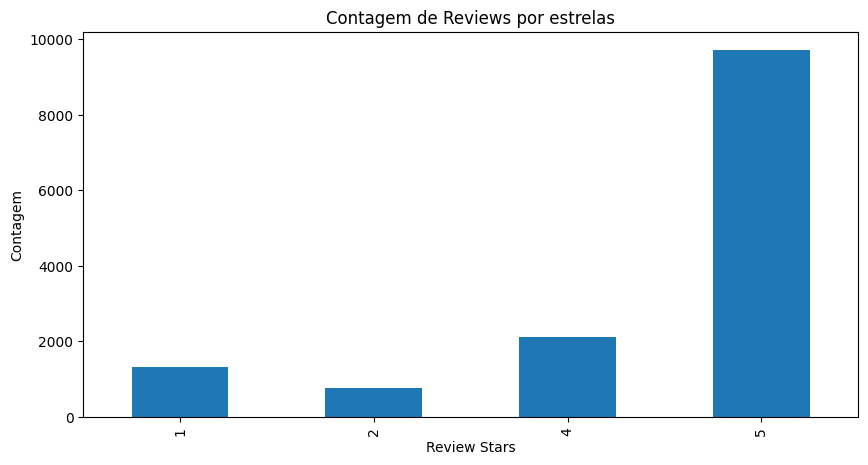

In [18]:
ax = df_reviews['Score'].value_counts().sort_index().plot(kind='bar',
                                                  title='Contagem de Reviews por estrelas',
                                                  figsize=(10, 5)
                                                 )

ax.set_xlabel('Review Stars')
ax.set_ylabel('Contagem')
plt.show()

In [19]:
stop_pt = nltk.corpus.stopwords.words('portuguese')
stop_en = nltk.corpus.stopwords.words('english')
stopwords_pa = stop_en + stop_pt
stopwords_pa.extend(['-',''])

In [20]:
list_words = texts.split()
list_words = [l.strip().lower() for l in list_words]

In [21]:
# lista de palavras do Text 'reviews'
list_words = [l.strip(string.punctuation) for l in list_words]
list_words = [l for l in list_words if l not in stopwords_pa]
freqdist = Counter(list_words)
dict(freqdist.most_common(10))

{'br': 6274,
 'like': 5923,
 'good': 4541,
 'one': 4018,
 'taste': 3852,
 'great': 3824,
 'coffee': 3622,
 'product': 3309,
 'tea': 3276,
 'flavor': 3165}

In [22]:
from wordcloud import WordCloud
cleaned = ' '.join(list_words)
wordcloud = WordCloud().generate(cleaned)

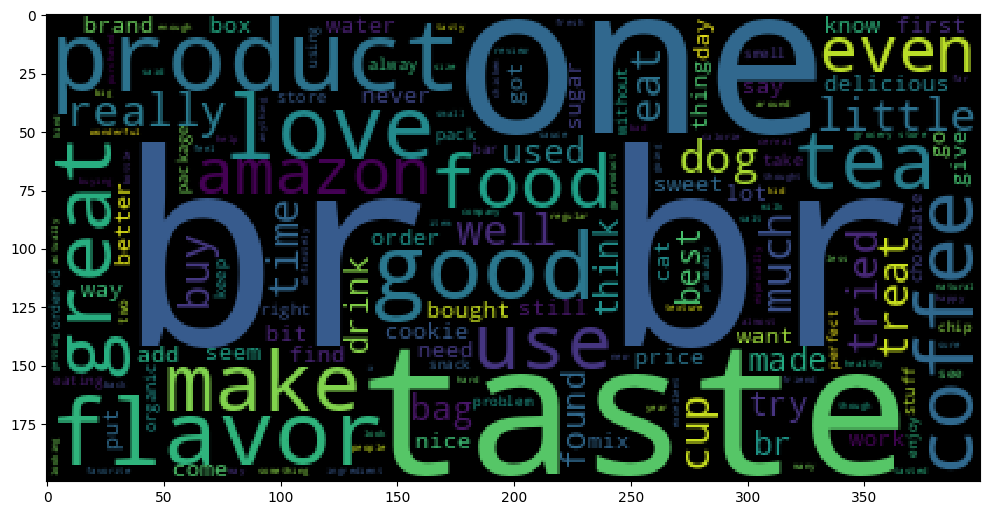

In [23]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(wordcloud, interpolation='nearest')
plt.grid(False)
plt.tight_layout()

In [24]:
freq_common_works = dict(freqdist.most_common(10))
freq_common_works

{'br': 6274,
 'like': 5923,
 'good': 4541,
 'one': 4018,
 'taste': 3852,
 'great': 3824,
 'coffee': 3622,
 'product': 3309,
 'tea': 3276,
 'flavor': 3165}

In [25]:
common_words = list(freq_common_works.keys())
common_words = common_words[0:4]

In [26]:
dispersion_words = common_words
plt.figure(figsize=(16,6))
#nltk_text.dispersion_plot(dispersion_words)

<Figure size 1600x600 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

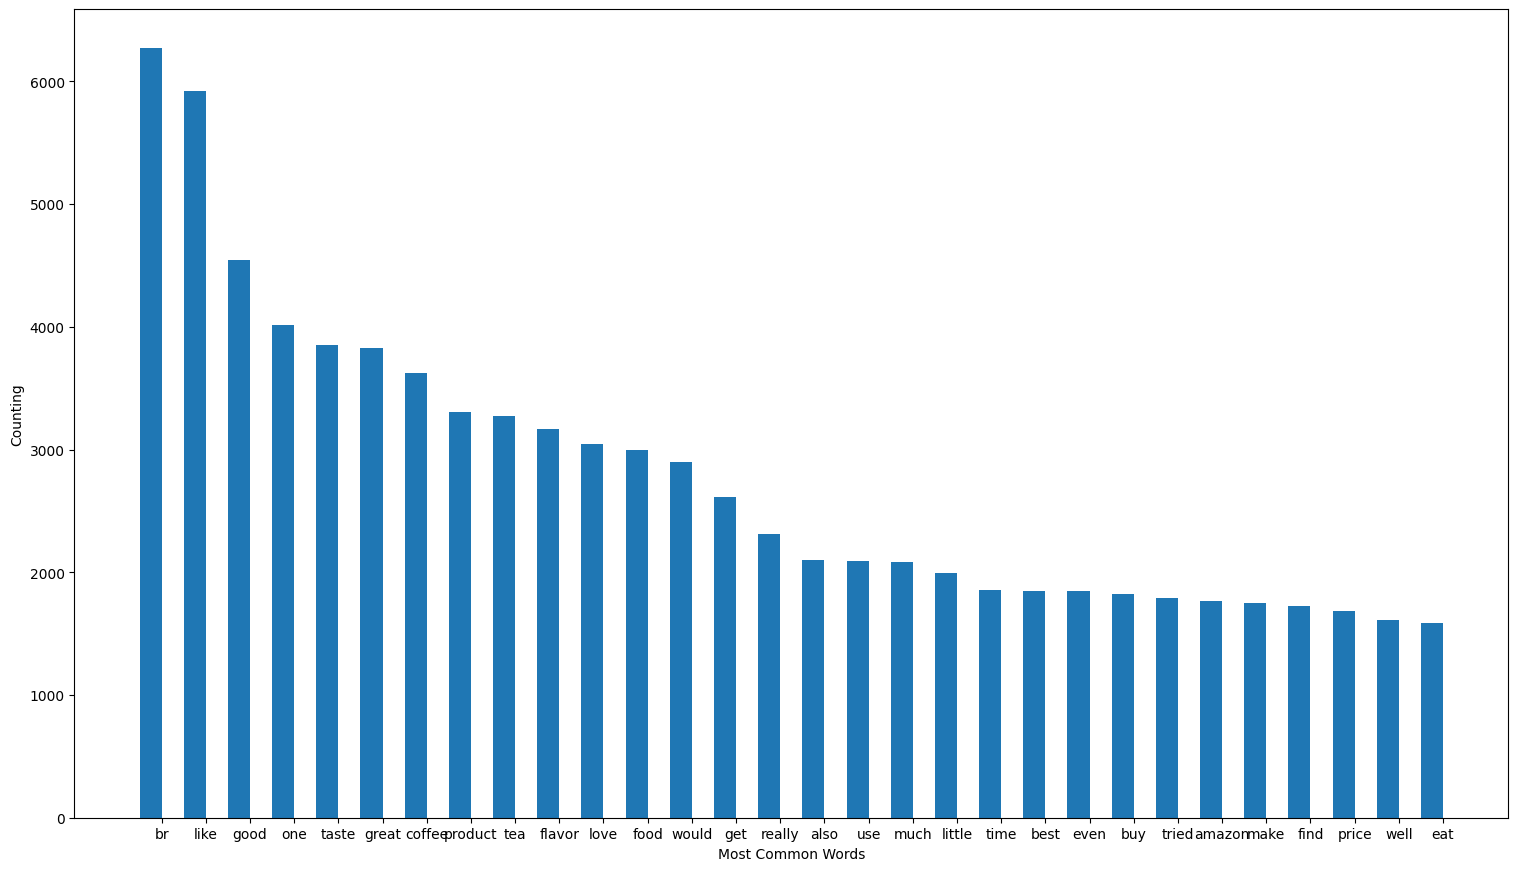

In [27]:
labels, values = zip(*freqdist.most_common(30))

indexes = np.arange(len(labels))
width = 0.5

plt.bar(indexes, values, width)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.xticks(indexes + width * 0.5, labels)
plt.xlabel('Most Common Words') 
plt.ylabel('Counting') 
plt.show()

In [28]:
# remove tags html
# cleaning
def clean(text):
    cleaned = re.compile(r'<.*?>')
    return re.sub(cleaned,'',text)

df_reviews['Text'] = df_reviews['Text'].apply(clean)

In [29]:
# remover caracteres especiais
def is_special(text):
    rem = ''
    for i in text:
        if i.isalnum():
            rem = rem + i
        else:
            rem = rem + ' '
    return rem

df_reviews['Text'] = df_reviews['Text'].apply(is_special)

In [30]:
# Converter - lowercase
def to_lower(text):
    return text.lower()

df_reviews['Text'] = df_reviews['Text'].apply(to_lower)

In [32]:
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

def rem_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    return [w for w in words if w not in stop_words]

df_reviews['Text'] = df_reviews['Text'].apply(rem_stopwords)

[nltk_data] Downloading package punkt to /home/andvsilva/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/andvsilva/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/andvsilva/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [33]:
#No review tenha palavras de outro idioma
def stem_txt(text):
    ss = SnowballStemmer('english')
    return " ".join([ss.stem(w) for w in text])

df_reviews['Text'] = df_reviews['Text'].apply(stem_txt)
#df_reviews['Text']

In [34]:
df_reviews.columns

Index(['Score', 'Text', 'negative'], dtype='str')

In [35]:
# converter string para inteiro
df_reviews['negative'] = pd.to_numeric(df_reviews['negative'])

In [36]:
df_reviews.info()

<class 'pandas.DataFrame'>
Index: 13906 entries, 232778 to 433985
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Score     13906 non-null  int64
 1   Text      13906 non-null  str  
 2   negative  13906 non-null  int64
dtypes: int64(2), str(1)
memory usage: 434.6 KB


In [37]:
df_reviews['Text']

232778    pregnanc gluten free look good crunchi snack m...
447941    tast like coconut water hit mango enjoy would ...
443448    feed dog sojo everi day almost year dog love g...
234998    pretti good toy big dog though 3 dog 2 big one...
532107    never review product good bad coffe bad typic ...
                                ...                        
143689    kraft mac chees much better name brand price w...
353428    like gym crave fast meal replac among everyth ...
340899    pasta becam intermitt local shelv luckili avai...
412556    unsur buy larg bag coffe bean negat review ple...
433985    bought think would good travel tast good help ...
Name: Text, Length: 13906, dtype: str

In [38]:
# create preprocess_text function
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())

    # Remove stop words
    filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]

    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]


    # Join the tokens back into a string
    processed_text = ' '.join(lemmatized_tokens)
    return processed_text

In [39]:
df_reviews['Text'] = df_reviews['Text'].apply(preprocess_text)
df_reviews['Text']

232778    pregnanc gluten free look good crunchi snack m...
447941    tast like coconut water hit mango enjoy would ...
443448    feed dog sojo everi day almost year dog love g...
234998    pretti good toy big dog though 3 dog 2 big one...
532107    never review product good bad coffe bad typic ...
                                ...                        
143689    kraft mac chees much better name brand price w...
353428    like gym crave fast meal replac among everyth ...
340899    pasta becam intermitt local shelv luckili avai...
412556    unsur buy larg bag coffe bean negat review ple...
433985    bought think would good travel tast good help ...
Name: Text, Length: 13906, dtype: str

In [40]:
X = df_reviews['Text']
y = df_reviews['negative']

In [41]:
# release memory RAM
tool.release_memory(df_reviews)

memory RAM released.


In [42]:
## Convert a collection of text documents to a matrix of token counts.
cv = CountVectorizer()

# feature
X = cv.fit_transform(X).toarray() # array type

smote = SMOTE()

# inbalance data to balance
X, y = smote.fit_resample(X, y)

print("X.shape = ",X.shape)
print("y.shape = ",y.shape)

X.shape =  (23666, 16936)
y.shape =  (23666,)


In [43]:
x_train, x_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)

In [44]:
# release memory - array
tool.release_array(X)
tool.release_array(y)

In [45]:
#Criando funções para avaliação dos modelos
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(8,8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap, aspect='auto')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.grid(False)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [46]:
def clf_eval(clf, X, y_true, classes=['Positivo', 'Negativo']):
    y_pred = clf.predict(X)
    clf_matrix = confusion_matrix(y_true, y_pred)
    print('Classification Report')
    print(classification_report(y_true, y_pred, target_names=classes))
    print('ROC Score: {}'.format(roc_auc_score(y_true, y_pred)))
    print('Accuracy Score: {}'.format(accuracy_score(y_true, y_pred)))
    print('Average Precision Score: {}'.format(average_precision_score(y_true, y_pred)))
    print('f1 Score: {}'.format(f1_score(y_true, y_pred)))
    plot_confusion_matrix(clf_matrix, classes=classes)
    return roc_auc_score(y_true, y_pred)

## Modeling – What modeling techniques should we apply?

### Machine Learning

In [47]:
from sklearn.naive_bayes import GaussianNB

clf_gnb = GaussianNB().fit(x_train, y_train)

### Evaluation – Which model best meets the business objectives?

Classification Report
              precision    recall  f1-score   support

    Positivo       1.00      0.63      0.77      9401
    Negativo       0.73      1.00      0.84      9531

    accuracy                           0.81     18932
   macro avg       0.87      0.81      0.81     18932
weighted avg       0.86      0.81      0.81     18932

ROC Score: 0.8136900329752155
Accuracy Score: 0.8149693640397211
Average Precision Score: 0.7312413687279423
f1 Score: 0.8447595834256592
Confusion matrix, without normalization
[[5898 3503]
 [   0 9531]]


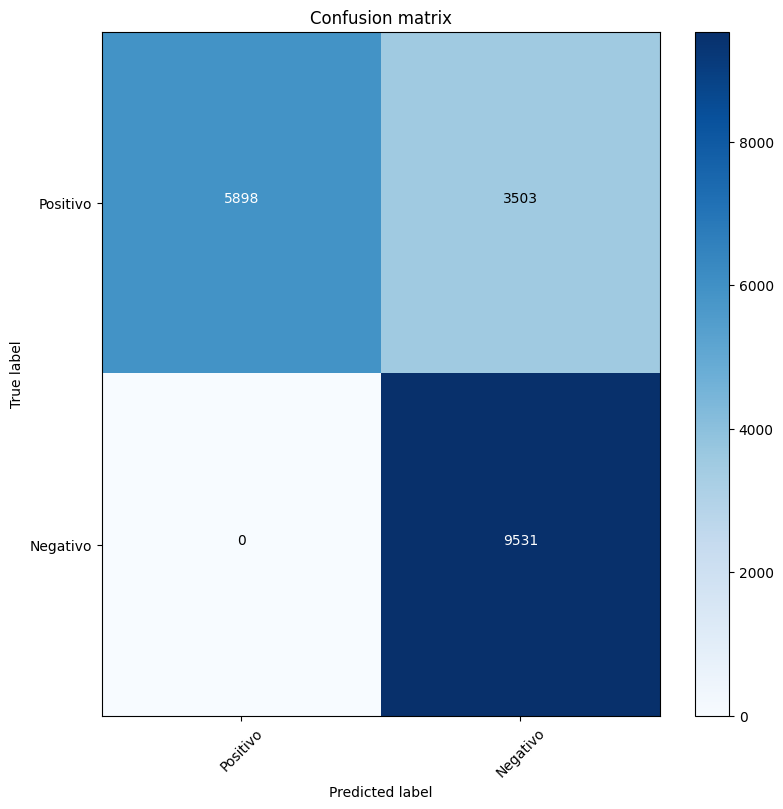

In [48]:
roc_gnb = clf_eval(clf_gnb, x_train, y_train)

#### Naive Bayes classifier for multivariate Bernoulli model

In [49]:
from sklearn.naive_bayes import BernoulliNB

clf_bnb = BernoulliNB(alpha=0.20, 
                     binarize=0.0, 
                     fit_prior=True, 
                     class_prior=None).fit(x_train, y_train)

### Evaluation – Which model best meets the business objectives?

Classification Report
              precision    recall  f1-score   support

    Positivo       0.88      0.74      0.80      9401
    Negativo       0.78      0.90      0.83      9531

    accuracy                           0.82     18932
   macro avg       0.83      0.82      0.82     18932
weighted avg       0.83      0.82      0.82     18932

ROC Score: 0.8188685729169489
Accuracy Score: 0.8194062962180435
Average Precision Score: 0.7498320815158933
f1 Score: 0.8333901856634667
Confusion matrix, without normalization
[[6962 2439]
 [ 980 8551]]


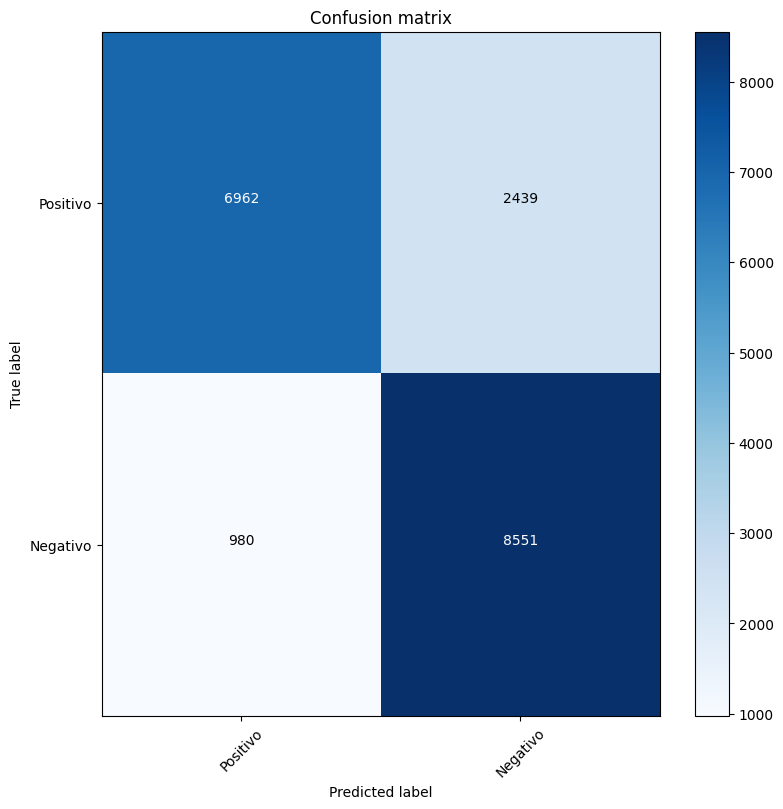

In [50]:
roc_bnb = clf_eval(clf_bnb, x_train, y_train)

#### Gradient Boosting for classification.

In [52]:
gb_clf = GradientBoostingClassifier()
gb_clf_sa =gb_clf.fit(x_train, y_train)
pred_train = gb_clf_sa.predict(x_train)

### Evaluation – Which model best meets the business objectives?

Classification Report
              precision    recall  f1-score   support

    Positivo       0.89      0.83      0.86      2432
    Negativo       0.83      0.89      0.86      2302

    accuracy                           0.86      4734
   macro avg       0.86      0.86      0.86      4734
weighted avg       0.86      0.86      0.86      4734

ROC Score: 0.8622870487333668
Accuracy Score: 0.8614279678918462
Average Precision Score: 0.7965163017563059
f1 Score: 0.8624737945492662
Confusion matrix, without normalization
[[2021  411]
 [ 245 2057]]


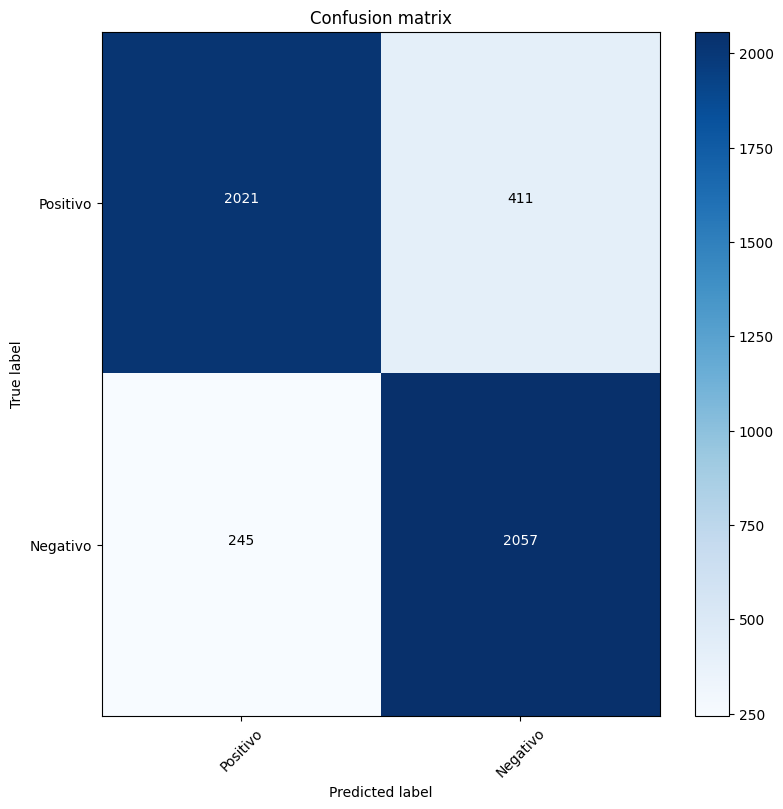

In [53]:
roc_gb = clf_eval(gb_clf_sa, x_validation, y_validation)

#### Deep learning: Keras

In [54]:
plt.style.use("seaborn-v0_8-whitegrid")
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)

In [55]:
model = keras.Sequential([layers.Dense(1024, activation='relu'),
                          layers.Dropout(0.3),
                          layers.BatchNormalization(),
                          layers.Dense(1024, activation='relu'),
                          layers.Dropout(0.3),
                          layers.BatchNormalization(),
                          layers.Dense(1024, activation='sigmoid'),
                          layers.Dropout(0.3),
                          layers.BatchNormalization(),
                          layers.Dense(1),
                         ])

#model.compile(optimizer='adam', loss='mae',)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

E0000 00:00:1769555818.860884   44193 cuda_executor.cc:1309] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1769555818.871533   44193 gpu_device.cc:2342] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [56]:
# fitting...
history = model.fit(x_train, y_train,
                    validation_data=(x_validation, y_validation),
                    batch_size=256,
                    epochs=10,
                    verbose=1,
                   )

2026-01-27 20:17:00.504788: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 2565058816 exceeds 10% of free system memory.


Epoch 1/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step - accuracy: 0.7760 - loss: 3.1800

2026-01-27 20:17:28.939570: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 641400192 exceeds 10% of free system memory.


74/74 ━━━━━━━━━━━━━━━━━━━━ 24s 273ms/step - accuracy: 0.8136 - loss: 2.7920 - val_accuracy: 0.5139 - val_loss: 7.8343
Epoch 2/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 18s 248ms/step - accuracy: 0.8383 - loss: 2.5376 - val_accuracy: 0.6876 - val_loss: 4.7348
Epoch 3/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 21s 249ms/step - accuracy: 0.8160 - loss: 2.8919 - val_accuracy: 0.8234 - val_loss: 2.7498
Epoch 4/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 18s 248ms/step - accuracy: 0.8347 - loss: 2.6093 - val_accuracy: 0.8392 - val_loss: 2.5280
Epoch 5/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 20s 273ms/step - accuracy: 0.8473 - loss: 2.3934 - val_accuracy: 0.8464 - val_loss: 2.4121
Epoch 6/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 21s 289ms/step - accuracy: 0.8638 - loss: 2.1509 - val_accuracy: 0.8597 - val_loss: 2.2194
Epoch 7/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 20s 265ms/step - accuracy: 0.8602 - loss: 2.1862 - val_accuracy: 0.8050 - val_loss: 3.0556
Epoch 8/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 21s 278ms/step - accuracy: 0.8495 - loss: 2.3879 - val_accuracy: 0.833

In [57]:
joblib.dump(model, 'modelkeras.pkl')
joblib.dump(model, 'modelkeras.h5')

['modelkeras.h5']

In [60]:
# serialize model to JSON
from keras.models import model_from_json

# serialize model to JSON
model_json = model.to_json()

with open("modelkeras.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
model.save_weights("modelkeras.weights.h5")
print("Saved model to disk")

Saved model to disk


In [61]:
with open('cv.pkl','wb') as f:
    pickle.dump(cv,f)

### Evaluation – Which model best meets the business objectives?

The loss function compares the prediction generated by the model with the true value. It calculates a numerical value that represents the mismatch or error between the predicted and the true value.

Text(0.5, 1.0, 'The learning curves')

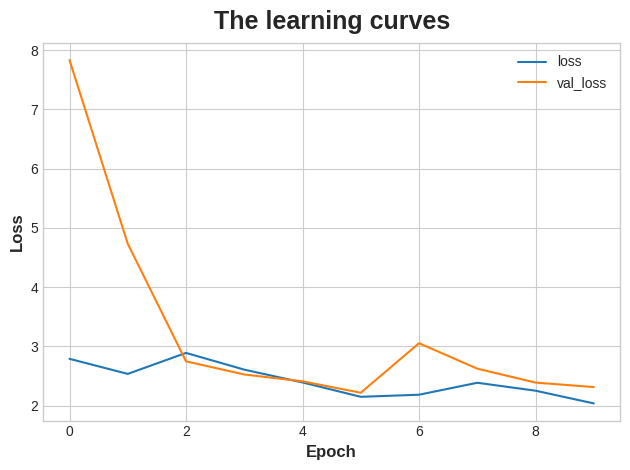

In [62]:
# Show the learning curves
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('The learning curves')

  3/148 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step  

2026-01-27 20:21:55.768560: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 641400192 exceeds 10% of free system memory.


148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step
Classification Report
              precision    recall  f1-score   support

    Positivo       0.86      0.86      0.86      2432
    Negativo       0.85      0.85      0.85      2302

    accuracy                           0.85      4734
   macro avg       0.85      0.85      0.85      4734
weighted avg       0.85      0.85      0.85      4734

ROC Score: 0.8541939360510311
Accuracy Score: 0.8542458808618505
Average Precision Score: 0.7950982069922878
f1 Score: 0.8504551365409623
Confusion matrix, without normalization
[[2082  350]
 [ 340 1962]]


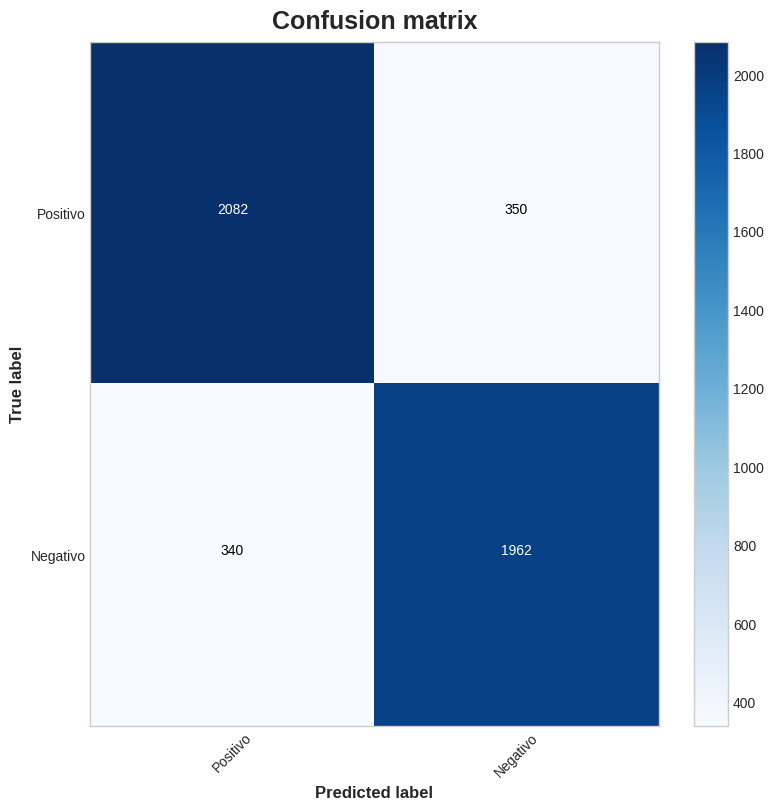

In [63]:
y_pred= (model.predict(x_validation) > 0.5).astype("int32")

clf_matrix = confusion_matrix(y_validation, y_pred)
print('Classification Report')
print(classification_report(y_validation, y_pred, target_names=['Positivo', 'Negativo']))
print('ROC Score: {}'.format(roc_auc_score(y_validation,y_pred)))
print('Accuracy Score: {}'.format(accuracy_score(y_validation, y_pred)))
print('Average Precision Score: {}'.format(average_precision_score(y_validation, y_pred)))
print('f1 Score: {}'.format(f1_score(y_validation, y_pred)))
plot_confusion_matrix(clf_matrix, classes=['Positivo', 'Negativo'])
roc_keras = roc_auc_score(y_validation, y_pred)

In [64]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') 
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
    plt.grid(True) 

In [65]:
clf_gnb_roc = clf_gnb.predict(x_validation)
gnb_roc_auc = roc_auc_score(y_validation, clf_gnb_roc)

model_roc = model.predict(x_validation)  # keras
model_roc_auc = roc_auc_score(y_validation, model_roc)


fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_validation, clf_gnb_roc)
fpr_net, tpr_net_lr, thresholds_net_lr = roc_curve(y_validation, model_roc)

 14/148 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step

2026-01-27 20:21:59.700475: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 641400192 exceeds 10% of free system memory.


148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step


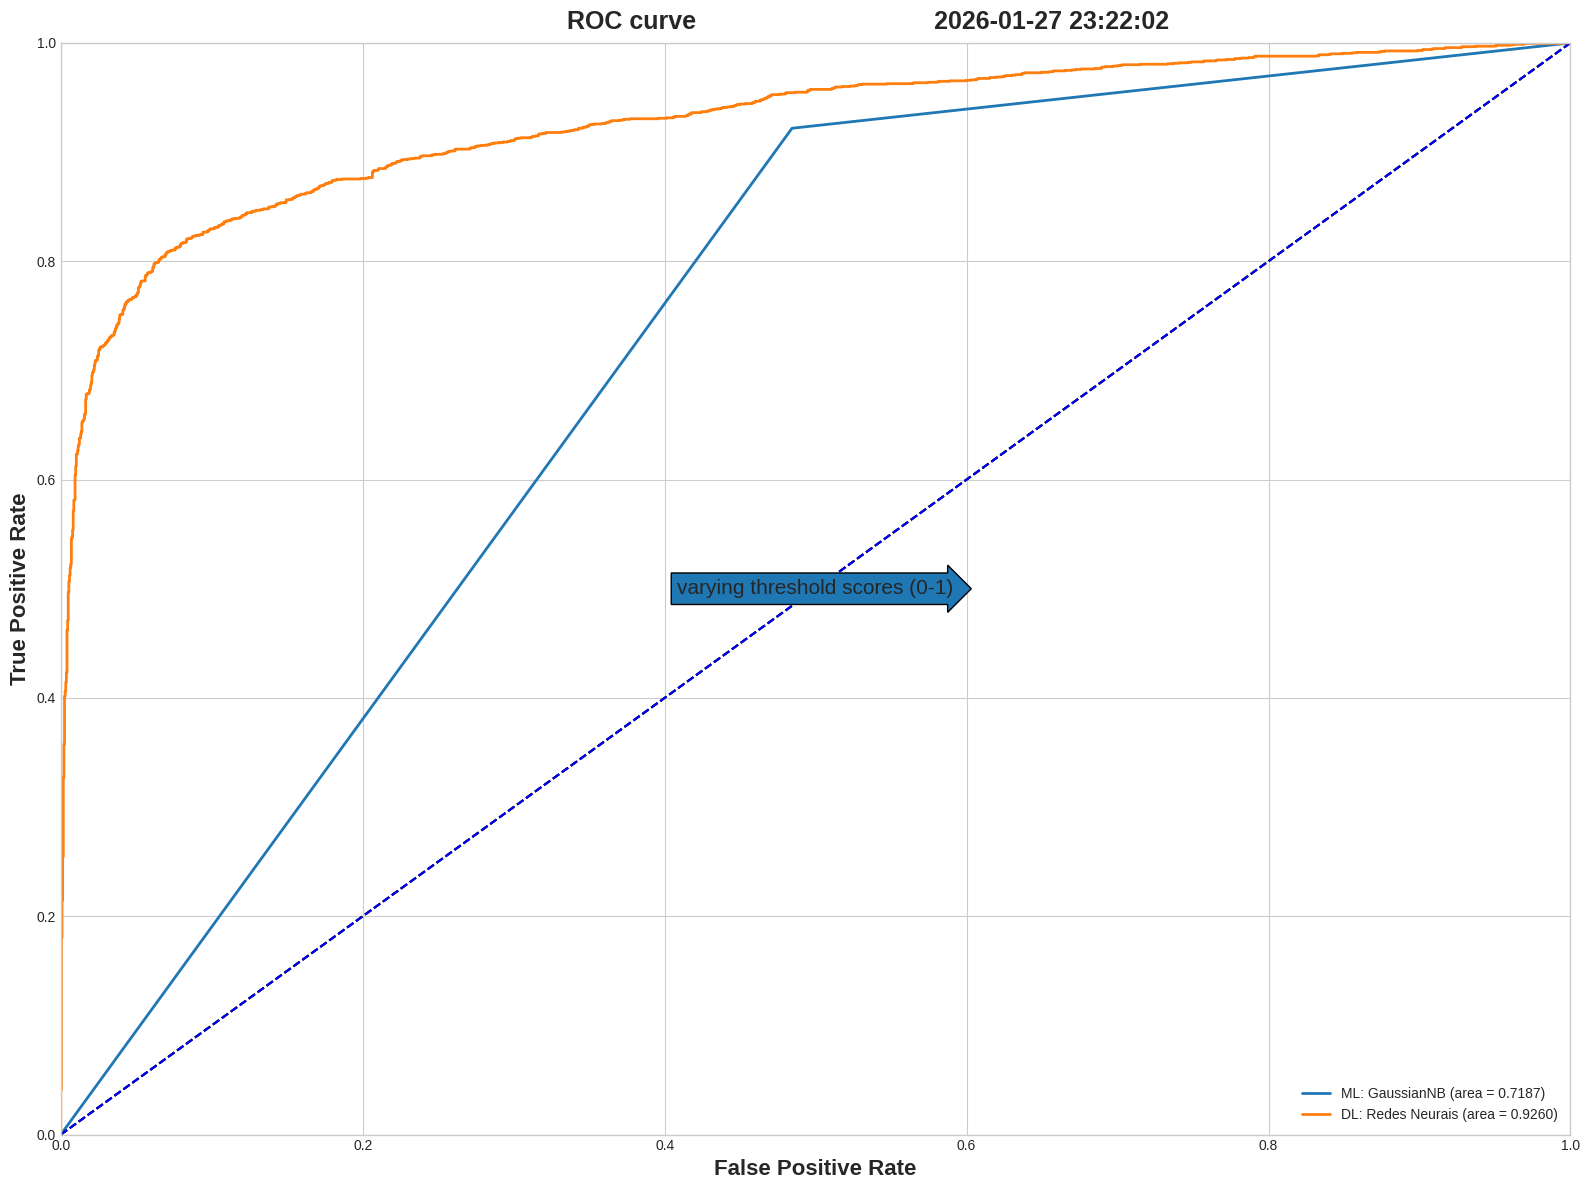

In [66]:
plt.figure(figsize=(16, 12))                                    # Not shown
plot_roc_curve(fpr_lr, tpr_lr, label='ML: GaussianNB (area = %0.4f)' % gnb_roc_auc)
plot_roc_curve(fpr_net, tpr_net_lr, label='DL: Redes Neurais (area = %0.4f)' % model_roc_auc)
#plot_roc_curve(fpr_bnb, tpr_bnb, label='BernoulliNB')
#plot_roc_curve(fpr_gb, tpr_gb, label='Gradient Boosting')
plt.plot([0, 1], [0, 1],'b--') 
plt.text(0.5, 0.5, "varying threshold scores (0-1)", rotation=0, size=15,ha="center", va="center",bbox=dict(boxstyle="rarrow")) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
now = strftime("%Y-%m-%d %H:%M:%S", gmtime())
plt.title(f'               ROC curve                                  {now}')
plt.legend(loc="lower right") 
plt.savefig('ROC_curves') 
plt.show()

In [67]:
#### File end HERE

# time of execution in minutes
time_exec_min = round( (time.time() - start_time)/60, 4)

print(f'time of execution (preprocessing): {time_exec_min} minutes')
print("the preprocessing is done.")
print("The next step is to do the feature engineering.")
print("All Done. :)")

time of execution (preprocessing): 57.4516 minutes
the preprocessing is done.
The next step is to do the feature engineering.
All Done. :)
